# ARIM情報活用講座：　基礎編　
# 第3回：　Scikit-learn（分類）

## Scikit-learnライブラリについて

Scikit-learnは、Pythonで機械学習のタスクを実装するための包括的なライブラリです。Scikit-learnは、分類、回帰、クラスタリング、次元削減などの機械学習アルゴリズムやツールを提供します。データの前処理、特徴抽出、モデルの評価などもサポートしており、機械学習の実装を容易にします。

## 本編の目標

Irisデータセットを使用して機械学習の分類タスクを学びます。

1. **分類アルゴリズムの学習**: Irisデータセットは、3つの異なるアヤメの品種を分類するためのデータです。このデータセットを使用して、分類アルゴリズム（ロジスティック回帰、決定木、ランダムフォレストなど）を学び、品種の分類を実施することができます。

2. **特徴選択と次元削減の理解**: Irisデータセットには、ガクと花びらについてそれぞれ長さと幅の4つの特徴量が含まれています。これらの特徴を分析し、適切な特徴の選択や次元削減（主成分分析など）を行うことで、モデルのパフォーマンス向上につなげることができます。

3. **モデル評価とパフォーマンス指標の理解**: Irisデータセットを使用してトレーニングしたモデルを評価し、予測のパフォーマンスを評価することができます。正解率、適合率、再現率、F1スコアなどのパフォーマンス指標を理解し、モデルの性能を評価するスキルを習得することができます。

4. **データの可視化と解釈**: Irisデータセットは、データの可視化に適しています。特徴の分布や相関関係を可視化することで、データの特性やパターンを理解することができます。また、モデルの解釈や予測結果の説明に役立つ洞察を得ることもできます。


## 分類で扱うデータセット
Irisデータセットは、統計学や機械学習の分野で広く使用される有名なデータセットです。このデータセットは、植物学の分野で研究されているアヤメ（Iris）の花の特徴に関するデータを含んでいます。

Irisデータセットには、150のサンプルがあり、各サンプルはアヤメの花の特徴を表す4つの数値データで構成されています。これらの特徴は、がく片（sepal）の長さと幅、花びら（petal）の長さと幅を測定したものです。また、各サンプルは3つの異なるアヤメの品種（setosa、versicolor、virginica）に属しています。

データセットは、分類問題やクラス分類のアルゴリズムの評価や比較などに使用されます。特に、機械学習アルゴリズムの性能や汎化能力を評価するためのベンチマークデータセットとして広く利用されています。また、データの整形や可視化、特徴抽出、モデルのトレーニングなどの様々なデータ処理タスクに使用することができます。

# 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（Google colabに接続しない場合には不要）

In [ ]:
!git clone https://github.com/ARIM-Training/Training_python_4.git
%cd Training_python_4

## 1.データセットの読み込み

### ライブラリのインポート
カリキュラムで扱うpythonのライブラリを`import`文でロードします。
機械学習のライブラリであるscikit-learnは後半でimportします。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### ファイルの読み込み

一般には”開く（Open）”の操作に該当しますが、pythonではライブラリごとファイルオープンの命令文が異なります。ここではpandasのcsvを読みこむ時に使う`pd.read_csv()`メソッドを使います。`pd.read_csv()`メソッドを使用することで、CSVファイルからデータを簡単に読み込み、データの整形や分析、可視化などの処理を行うことができます。

In [2]:
#データセットの読み込み
df=pd.read_csv("data/dataset/Iris.csv")

In [3]:
#データセットの確認
print (df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## 2. 探索的データ分析（データの可視化と解釈）

探索的データ分析（EDA）は、データのパターン、特徴、関係性を把握し、洞察を得るためにデータを調査し要約するプロセスです。EDAは、データ分析や機械学習プロジェクトにおいて重要なステップです。

### EDAの目的

EDAの主な目的は次の通りです：

1. **データの理解**: EDAは、データセットや変数について理解を深めることを支援します。データの構造、内容、品質についての洞察を得ることができます。

2. **データのパターンと分布の特定**: EDAを使用してデータを探索し、パターン、トレンド、分布を特定します。可視化や統計的な手法を用いて、データが異なる変数間でどのように分布しているかを理解します。

3. **異常値と外れ値の検出**: EDAは、データセット内の異常値、外れ値、欠損値を特定するのに役立ちます。これにより、データ品質を確保し、データの前処理やクレンジングについての意思決定を行うことができます。

4. **関係と依存関係の探索**: EDAにより、変数間の関係や依存関係を調査することができます。相関分析、クロス集計、可視化を用いて、データ内の関連や依存関係を特定します。

5. **特徴量の選択とエンジニアリング**: EDAは、特徴量の選択とエンジニアリングのプロセスを導く洞察を提供します。特徴量間の関係を理解することで、モデリングに最も関連性の高い変数を特定することができます。

### 2.1 概要統計

概要統計（Descriptive Statistics）は、データセットの要約統計量を計算することで、データの特徴や分布を理解するための手法です。主な概要統計として、平均、中央値、最小値、最大値、標準偏差、四分位数などがあります。これらの統計量は、データの中心傾向、ばらつき、スケールなどを示す指標として利用されます。

Pythonの`describe()`メソッドは、pandasライブラリに含まれており、データセットの概要統計を簡単に取得するための便利な方法です。`describe()`メソッドは、数値データやカテゴリカルデータに対して異なる統計情報を提供します。

具体的には、`describe()`関数は以下の統計情報を計算します：

1. **カウント（Count）:** データの非欠損値の数を示します。
2. **平均（Mean）:** データの平均値を示します。
3. **標準偏差（Standard Deviation）:** データのばらつきの尺度を示します。
4. **最小値（Minimum）:** データの最小値を示します。
5. **第一四分位数（25th Percentile）:** データの下位25%の値を示します。
6. **中央値（Median）:** データの中央値（50thパーセンタイル）を示します。
7. **第三四分位数（75th Percentile）:** データの上位25%の値を示します。
8. **最大値（Maximum）:** データの最大値を示します。

これらの統計情報は、データセット内の数値データの特徴や分布を把握するのに役立ちます。また、カテゴリカルデータに対しては、要素の数、最頻値、最頻値の出現回数を提供します。

In [4]:
#概要統計: 平均値、中央値、標準偏差、四分位数（パーセンタイル）などの指標を計算し、変数の中心傾向とばらつきを理解します。
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.2 ペアプロット（散布図行列）
ペアプロット（Pair plot）は、データセット内の複数の数値変数の組み合わせに基づいた散布図行列を可視化する手法です。これにより、変数間の相関やパターンを把握することができます。

PythonのSeabornライブラリには、`pairplot()`メソッドが用意されており、ペアプロットを簡単に作成するための便利な方法が提供されています。`pairplot()`メソッドは、データセット内の数値変数の組み合わせに基づいて散布図行列を作成し、各変数間の散布図やヒストグラムを表示します。

`pairplot()`メソッドには、さまざまなオプションがあります。たとえば、`hue`パラメータを使用すると、カテゴリ変数に基づいて散布図の色分けが可能です。また、`diag_kind`パラメータを使用すると、対角線上に表示されるヒストグラムやカーネル密度推定プロットの種類を指定することもできます。

ペアプロットは、特に特徴間の関係を視覚化し、データの相関やパターンを理解する際に有用です。さまざまな変数の組み合わせを効率的に可視化することで、データの特性や潜在的な相互作用を発見することができます。

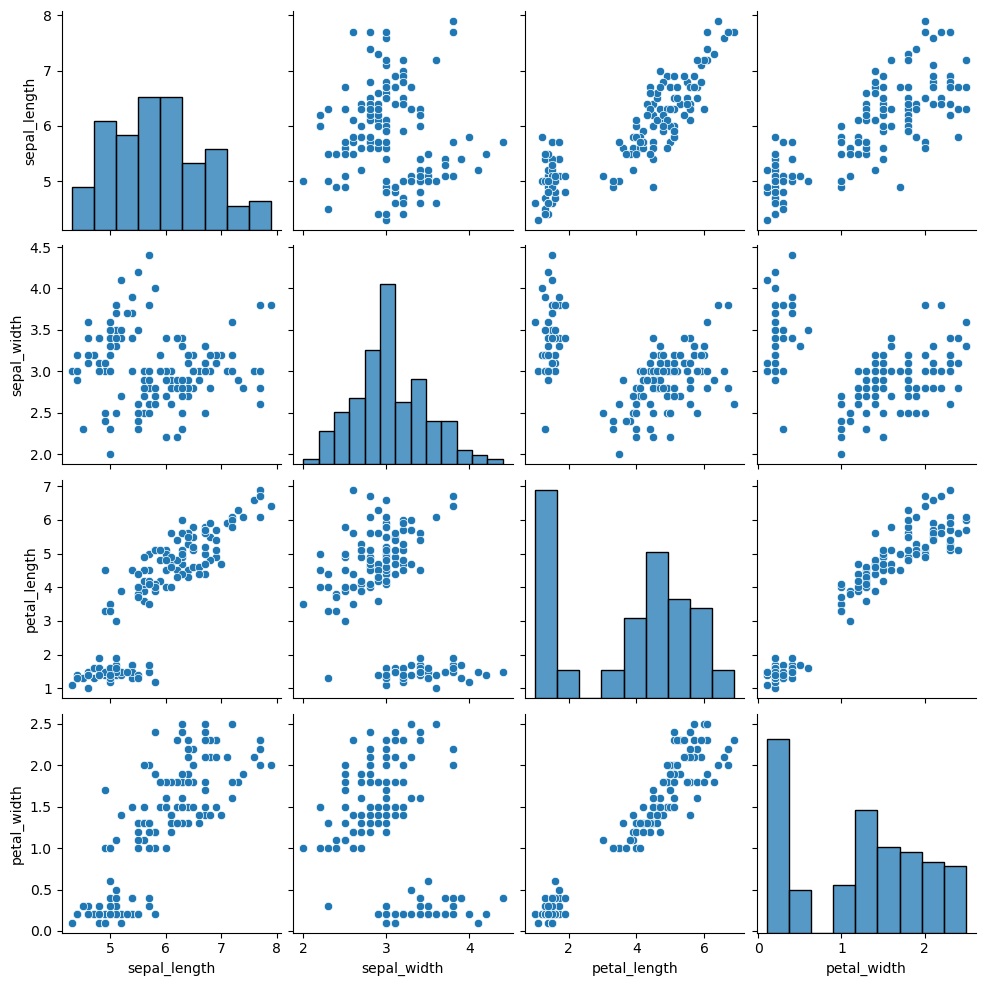

In [5]:
#　ペアプロットによる各変数間の二次元空間像
sns.pairplot(df)
plt.show()

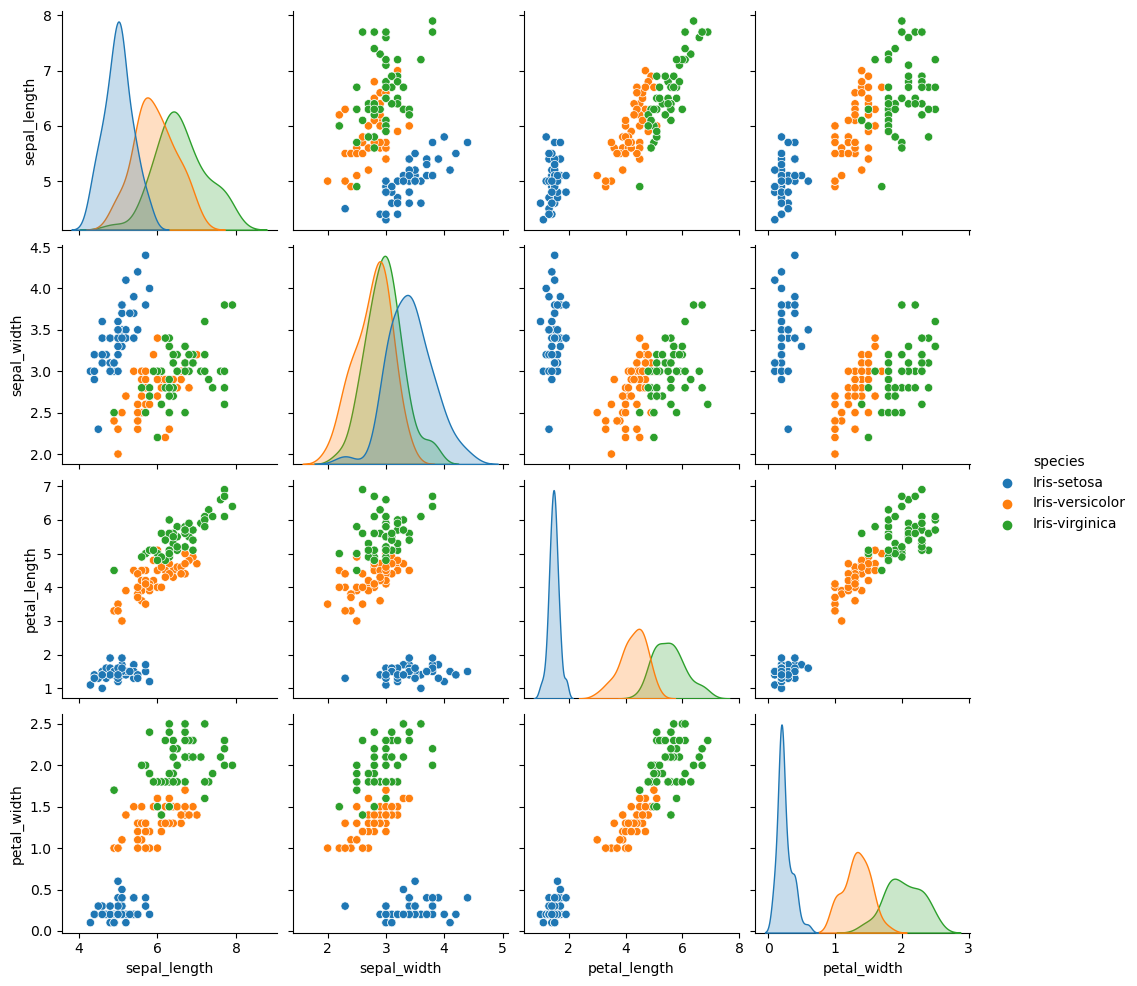

In [6]:
#　ペアプロットによる各変数間の二次元空間像（その２）
sns.pairplot(df,hue='species')
plt.show()

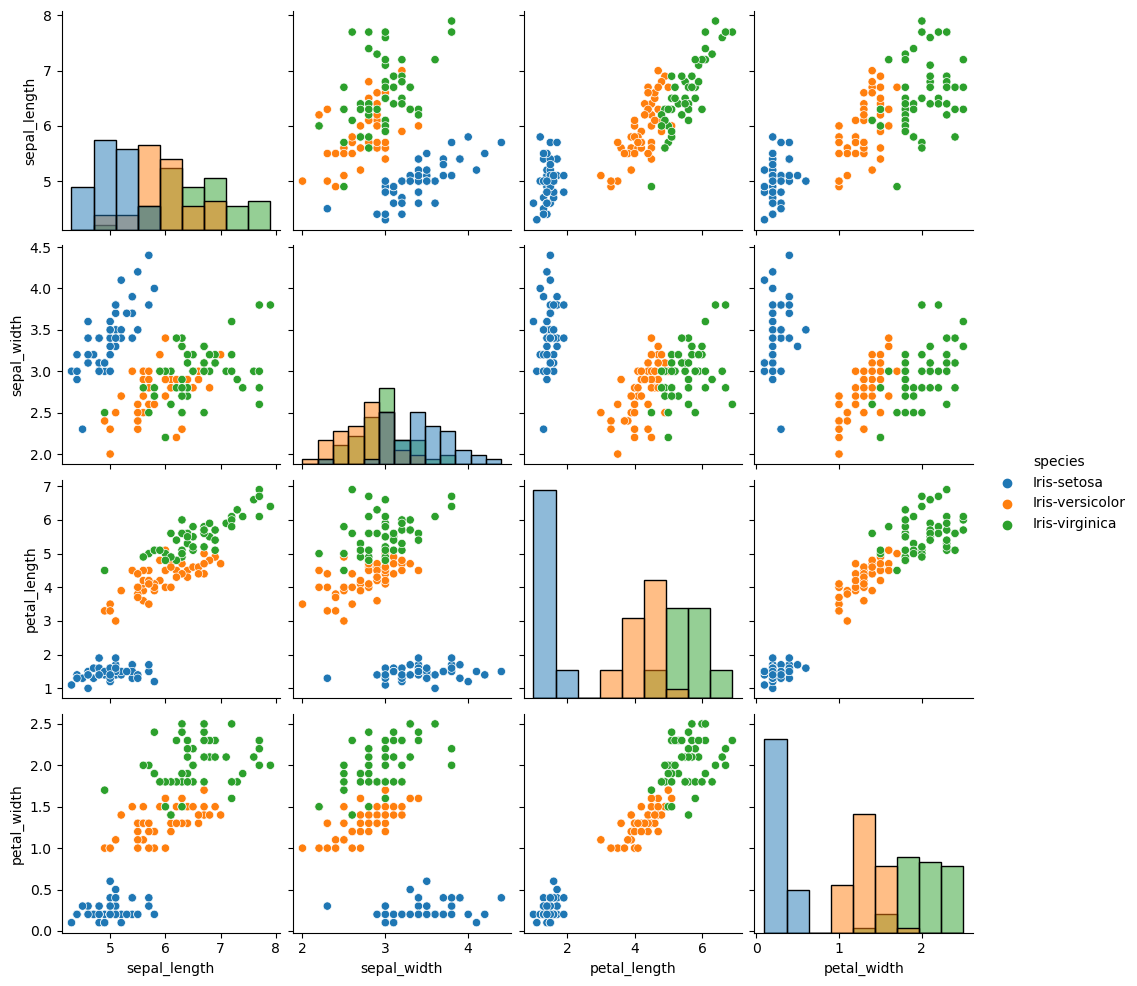

In [7]:
#　ペアプロットによる各変数間の二次元空間像（その３）
sns.pairplot(df,hue='species',diag_kind='hist')
plt.show()

### 2.3 グラフ化
setosaからvirginicaについて,それぞれのガクの長さとガクの幅のみのデータセットへと変換し、グラフ化してみましょう。
ilocを使い、それぞれの品種でガクの長さ（sepal_length）とガクの幅（ssepal_width）についてデータセットを分けてみましょう。

In [8]:
# 品種ごとの分割
setosa = df.iloc[:50,[0,1]]
versicolor = df.iloc[51:100,[0,1]]
virginica = df.iloc[101:150,[0,1]]

### 【解説】データセットの分割

`iloc`は、Pythonのpandasライブラリで提供されるメソッドであり、データフレーム内の行と列を位置（整数のインデックス）を使用して選択するために使用されます。以下に、`iloc`を使用してデータを分割する方法の説明文を示します。

データの分割には、まずデータフレームを特定の行と列の範囲で切り出し、それを新しいデータフレームとして取得する手順が含まれます。`iloc`を使うと、行や列を整数の位置に基づいて指定することができます。

データフレームを行方向に分割する場合：

```python
# データフレームを分割する
split_data = data.iloc[start_row:end_row, :]

# start_row: 分割の開始行の位置（整数）
# end_row: 分割の終了行の位置（整数）
# : (コロン): 列方向はすべての列を選択することを示します

# 分割されたデータを新しいデータフレームとして取得する
```

データフレームを列方向に分割する場合：

```python
# データフレームを分割する
split_data = data.iloc[:, start_column:end_column]

# : (コロン): 行方向はすべての行を選択することを示します
# start_column: 分割の開始列の位置（整数）
# end_column: 分割の終了列の位置（整数）

# 分割されたデータを新しいデータフレームとして取得する
```

上記のコード内の`start_row`、`end_row`、`start_column`、`end_column`には、分割の開始位置と終了位置を指定する整数値が入ります。開始位置と終了位置は、データフレーム内の行や列のインデックスの位置を表します。

`iloc`を使用することで、データフレームを指定した行と列の範囲で分割し、新しいデータフレームとして取得することができます。これにより、データの部分集合を効果的に取得し、それを別の解析や処理のために使用することができます。

In [9]:
#分割されたsetosaについてみてみましょう
setosa

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


### ガク長とガク幅のデータ空間におけるプロット

pythonでグラフ化するときにすぐれているのはmatplotlibライブラリです。その中で、`plt.plot()`は、PythonのMatplotlibライブラリの関数であり、グラフを作成するために使用されます。この関数は、与えられたデータを基に線グラフや散布図を描画します。

以下に、`plt.plot()`の基本的な使用法と一般的なパラメータの説明を示します：

```python
import matplotlib.pyplot as plt

# データの準備
x = [1, 2, 3, 4, 5]  # x軸の値
y = [2, 4, 6, 8, 10]  # y軸の値

# 線グラフの作成
plt.plot(x, y)

# グラフの表示
plt.show()
```

上記のコードでは、`x`と`y`にデータのリストを指定しています。`plt.plot(x, y)`は、`x`をx軸の値、`y`をy軸の値として線グラフを作成します。その後、`plt.show()`を呼び出すことで、グラフが表示されます。

`plt.plot()`関数には、さまざまなオプションや引数を指定することができます。以下によく使用されるパラメータをいくつか説明します：

- **`color`（色）**: グラフの線の色を指定します。一般的な色の指定方法は、`'r'`（赤）、`'g'`（緑）、`'b'`（青）などのショートカット文字列または、`'red'`（赤）、`'green'`（緑）、`'blue'`（青）などのカラーネームを使用します。
- **`linestyle`（線のスタイル）**: グラフの線のスタイルを指定します。一般的なスタイルの指定方法は、`'-'`（実線）、`'--'`（破線）、`':'`（点線）などの文字列を使用します。
- **`marker`（マーカー）**: 散布図を描画する場合に、各データポイントのマーカーのスタイルを指定します。`'o'`（円）、`'s'`（四角）、`'+'`（プラス記号）などが一般的なマーカースタイルです。
- **`label`（ラベル）**: グラフの凡例（レジェンド）に表示されるグラフのラベルを指定します。
- **`xlabel`（x軸ラベル）** および **`ylabel`（y軸ラベル）**: x軸とy軸のラベルを指定します。

これらのパラメータや他のオプションを使って、グラフの見た目やスタイルをカスタマイズすることができます。また、`plt.plot()`を複数回呼び出すことで、複数の線グラフや散布図を同じプロット上に表示することも可能です。

Matplotlibの`plt.plot()`は非常に柔軟な機能を提供しており、さまざまなグラフの描画に活用できます。

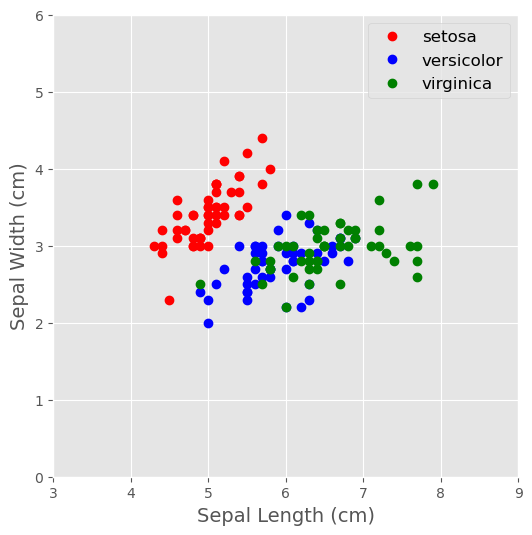

In [10]:
# matplotlibの初期設定
fig = plt.figure(figsize=(6,6))
plt.style.use('ggplot')

# 3品種のデータのプロット
plt.plot(setosa['sepal_length'], setosa['sepal_width'], 'o', c='red')
plt.plot(versicolor['sepal_length'], versicolor['sepal_width'], 'o', c='blue')
plt.plot(virginica['sepal_length'], virginica['sepal_width'], 'o', c='green')

# 軸ラベル等
plt.xlabel("Sepal Length (cm)", fontsize =14)
plt.ylabel("Sepal Width (cm)", fontsize =14)
plt.xlim(3,9)
plt.ylim(0, 6)
plt.legend(['setosa','versicolor','virginica','test'], fontsize = 12)

plt.show()

## 3. scikit-learnによる分類モデルの比較

### 3.1  データセットの分割（Data set splitting）
**目的**：
データセットの分割（Data set splitting）は、機械学習モデルの訓練と評価のために、データセットを訓練データとテストデータに分けるプロセスを指します。モデルがテストデータに対してどれくらい正確に予測できるかを評価することで、モデルの汎化能力や性能を測定します。

**訓練データ（Training Data）**：　機械学習モデルの訓練に使用されるデータセットです。モデルは、訓練データを分析してパターンや関連性を学習し、未知のデータに対して予測を行うための知識を獲得します。

**テストデータ（Test Data）**：モデルの訓練後に性能を評価するために使用されるデータセットです。テストデータは、訓練データとは異なるデータでなければなりません。

### 説明変数と目的変数

Pythonの操作の観点から説明変数（特徴量）と目的変数（ターゲット変数）について説明します。

機械学習や統計分析では、データセット内の変数を説明変数と目的変数に分けて扱います。

**説明変数**（または特徴量）は、データセット内の独立変数であり、予測や解析のための情報を提供します。これらの変数は、目的変数に影響を与える可能性がある特徴や属性を表しています。説明変数は、予測モデルの入力として使用され、それぞれのデータポイントに関する情報を提供します。

**目的変数**（またはターゲット変数）は、予測や分析の対象となる変数であり、説明変数に基づいて予測される値です。目的変数は、モデルが学習しようとする対象であり、予測の精度やモデルの評価に使用されます。

Pythonにおいて、データセット内の説明変数と目的変数は、通常、NumPy配列、pandasのデータフレーム、またはSciPyのスパース行列の形式で表現されます。これらのデータ構造を操作して、説明変数と目的変数を適切に抽出し、モデルの学習や予測に使用します。


In [11]:
# 説明変数と目的変数の用意しましょう

X = df.iloc[0:, 0:4] #ガクと花びらの長さ、幅を説明変数とします
y = df.iloc[0:, 4]   # 品種を目的変数とします

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

### データセットの分割

`train_test_split`関数は、Pythonのscikit-learnライブラリの一部として提供されている関数であり、データセットをトレーニングデータとテストデータに分割するために使用されます。

機械学習のモデルを構築する際には、利用可能なデータをトレーニングデータとテストデータに分割する必要があります。トレーニングデータを使用してモデルを学習し、テストデータを使用してモデルのパフォーマンスを評価します。

`train_test_split`関数は、以下のように使用されます：

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

上記のコードでは、`X`は説明変数（特徴量）のデータセットを表し、`y`は目的変数（ターゲット変数）のデータセットを表します。

`test_size`パラメータは、テストデータの割合を指定します。例えば、`test_size=0.2`とすると、データセットの20%がテストデータとして分割され、残りの80%がトレーニングデータとして使用されます。

`random_state`パラメータは、データの分割を行う際の乱数シードを指定します。これにより、データセットをランダムに分割する際に再現性を持たせることができます。同じ乱数シードを使用すると、実行ごとに同じ分割結果が得られます。

`train_test_split`関数は、指定されたデータセット（`X`と`y`）をトレーニングデータとテストデータに分割し、それぞれのデータセットを`X_train`、`X_test`、`y_train`、`y_test`に格納します。

このようにデータを分割することで、モデルのトレーニングには`X_train`と`y_train`を使用し、モデルの評価や予測には`X_test`と`y_test`を使用することができます。これにより、モデルのパフォーマンスを客観的に評価し、未知のデータに対する予測性能を推定することが可能となります。

`train_test_split`関数は、機械学習のワークフローにおいて非常に便利で頻繁に使用される関数です。データの分割により、モ

デルの過学習や未知のデータへの汎化能力の低下を評価することができます。

In [14]:
#データセットの分割のライブラリの読み込み
from sklearn.model_selection import train_test_split

# train_test_split関数によるデータセット分割
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,   # 20%をテストデータとするデータ分割
                                                    stratify = y,      # ３つの品種について均等分割
                                                    random_state=42
                                                    )  

In [15]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.1,1.5,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [16]:
y_train

8          Iris-setosa
106     Iris-virginica
76     Iris-versicolor
9          Iris-setosa
89     Iris-versicolor
            ...       
37         Iris-setosa
2          Iris-setosa
33         Iris-setosa
52     Iris-versicolor
3          Iris-setosa
Name: species, Length: 120, dtype: object

### モデル選択
scikit-learnは、機械学習モデルの実装や評価を支援するための豊富なツールセットを提供しています。分類タスクにおいて、scikit-learnではさまざまな分類アルゴリズムが利用可能です。モデルの選択は、データの特性やタスクの要件に基づいて行う必要があります。

以下に、scikit-learnの分類モデルの一部とその特徴を紹介します。

1. ロジスティック回帰（Logistic Regression）:
   - 線形分類モデルであり、クラスの確率を推定します。
   - データが線形に分離されている場合や、特徴量の重要度を理解したい場合に適しています。

2. k最近傍法（k-Nearest Neighbors）:
   - インスタンスベース学習の一種であり、最も近くにあるk個の近傍点を考慮してクラスを予測します。
   - データが局所的な構造を持ち、境界が複雑な場合に有効です。

3. サポートベクターマシン（Support Vector Machines, SVM）:
   - 線形または非線形の分類を行います。
   - マージン最大化を通じて境界を定義し、データを分類します。
   - データの分離が明確でない場合や、高次元のデータセットに適しています。

4. 決定木（Decision Trees）:
   - 非線形な分類を行うためのモデルで、条件に基づいてデータを分割します。
   - データの特徴量の重要度を理解することができます。

5. ランダムフォレスト（Random Forests）:
   - 複数の決定木を組み合わせたアンサンブル学習法であり、分類の正確性と汎化能力を向上させます。
   - 高い精度が要求される場合や、特徴量の重要度を評価したい場合に使用されます。

6. ニューラルネットワーク（Neural Networks）:
   - 複数の層で構成されたネットワークを使用して、非線形な分類を行います。
   - 大規模なデータセットや高度なパターンの抽出が必要な場合に適しています。

これらはscikit-learnの一部ですが、その他にも多くの分類モデルが提供されています。モデルの選択は、データセットの特性、データのサイズ、求められる精度、計算負荷などの要素を考慮しながら行う必要があります。また、選んだモデルのハイパーパラメータの調整や交差検証を行うことも重要です。

#### 1. 決定木

#### 1.1 モデル構築

In [17]:
# 決定木法のインポート（クラス指定）
from sklearn.tree import DecisionTreeClassifier

# 決定木法によるモデル構築（トレーニング）
model = DecisionTreeClassifier()
model.fit(X_train, y_train)   

DecisionTreeClassifier()

#### 1.2 モデルの評価：精度の計算
##### 訓練データ

In [18]:
#訓練データの予測ラベル
y_pred_train = model.predict(X_train)

In [19]:
### 訓練データの精度
print ("DecisionTreeClassifier training score : {:.3f}".format(model.score(X_train, y_train)))

DecisionTreeClassifier training score : 1.000


In [20]:
# scikit-learnのconfution_matrixを使った混同行列の表記方法
from sklearn import metrics
print(metrics.confusion_matrix(y_pred_train, y_train))

[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]


In [21]:
# Precision Recall scores
print(metrics.classification_report(y_pred_train, y_train, digits=3))

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        40
Iris-versicolor      1.000     1.000     1.000        40
 Iris-virginica      1.000     1.000     1.000        40

       accuracy                          1.000       120
      macro avg      1.000     1.000     1.000       120
   weighted avg      1.000     1.000     1.000       120



In [22]:
# pandasのcrosstbを使った混同行列の別の表記方法
pd.crosstab(y_pred_train, y_train, margins = True) 

species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,40,0,0,40
Iris-versicolor,0,40,0,40
Iris-virginica,0,0,40,40
All,40,40,40,120


#### テストデータ

In [23]:
#テストデータの予測ラベル
y_pred_test = model.predict(X_test)
print ("DecisionTreeClassifier test score : {:.3f}".format(model.score(X_test, y_test)))

DecisionTreeClassifier test score : 0.967


In [24]:
# pandasのcrosstbを使った混同行列の別の表記方法
pd.crosstab(y_pred_test, y_test, margins = True) 

species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,9,0,9
Iris-virginica,0,1,10,11
All,10,10,10,30


In [25]:
print(metrics.confusion_matrix(y_pred_test, y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [26]:
# Precision Recall scores
print(metrics.classification_report(y_pred_test, y_test, digits=3))

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        10
Iris-versicolor      0.900     1.000     0.947         9
 Iris-virginica      1.000     0.909     0.952        11

       accuracy                          0.967        30
      macro avg      0.967     0.970     0.967        30
   weighted avg      0.970     0.967     0.967        30



#### 2. ランダムフォレスト
#### 2.1 モデル構築

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)   

RandomForestClassifier()

#### 2.2 モデルの評価：精度の計算
#### 訓練データ

In [28]:
y_pred_train = model.predict(X_train)

In [29]:
print ("DecisionTreeClassifier training score : {:.3f}".format(model.score(X_train, y_train)))
pd.crosstab(y_pred_train, y_train, margins = True) 

DecisionTreeClassifier training score : 1.000


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,40,0,0,40
Iris-versicolor,0,40,0,40
Iris-virginica,0,0,40,40
All,40,40,40,120


#### テストデータ

In [30]:
y_pred_test = model.predict(X_test)  

In [31]:
print ("DecisionTreeClassifier test score : {:.3f}".format(model.score(X_test, y_test)))
pd.crosstab(y_pred_test, y_test, margins = True) 

DecisionTreeClassifier test score : 0.967


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,9,0,9
Iris-virginica,0,1,10,11
All,10,10,10,30


#### 3.サポートベクターマシーン
#### 3.1 モデル構築

In [32]:
# サポートベクター
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)   

SVC()

#### 3.2 モデルの評価：精度の計算
#### 訓練データ

In [33]:
y_pred_train = model.predict(X_train)

In [34]:
print ("SupportVectorClassifier training score : {:,.3f}".format(model.score(X_train, y_train)))
pd.crosstab(y_pred_train, y_train, margins = True) 

SupportVectorClassifier training score : 0.983


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,40,0,0,40
Iris-versicolor,0,39,1,40
Iris-virginica,0,1,39,40
All,40,40,40,120


#### テストデータ

In [35]:
y_pred_test = model.predict(X_test)

In [36]:
print ("SupportVectorClassifier test score : {:,.3f}".format(model.score(X_test, y_test)))
pd.crosstab(y_pred_test, y_test, margins = True) 

SupportVectorClassifier test score : 0.967


species,Iris-setosa,Iris-versicolor,Iris-virginica,All
row_0,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,9,0,9
Iris-virginica,0,1,10,11
All,10,10,10,30


In [37]:
# Precision Recall scores
print(metrics.classification_report(y_pred_test, y_test, digits=3))

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        10
Iris-versicolor      0.900     1.000     0.947         9
 Iris-virginica      1.000     0.909     0.952        11

       accuracy                          0.967        30
      macro avg      0.967     0.970     0.967        30
   weighted avg      0.970     0.967     0.967        30



# Closing：おわりに
Irisデータセットを使い、3クラス分類を行う機械学習モデルの操作を体験しました。このセクションでは次のことを学びました。

1. 分類アルゴリズムの評価: アヤメの3つの品種（Setosa、Versicolor、Virginica）はそれぞれ異なる特徴を持つことを理解し、Irisデータセットを使用してアルゴリズムの分類性能を評価して確かめました。

2. データの一般化と汎化性能の評価: Irisデータセットは比較的小さく、簡単に分類できるデータセットですが、用いる機械学習モデルの違いにより汎化性能が異なることを理解しました。モデルがIrisデータセットに過剰適合することなく新しいデータや異なるデータセットに対しても適切な分類結果を出力できるかどうかを確認することができました。